In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv('../summary_data/original/all_tools_TRB.csv')
df = df[df.nReads_TCR != 0]
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,repertoire_type,class
0,MP-11-28-12RNA_S2,CASSVNPGGYNEQFF,6.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000322,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
1,MP-11-28-12RNA_S2,CASIRTRNEKLFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
2,MP-11-28-12RNA_S2,CASSPGAANTEAFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
3,MP-11-28-12RNA_S2,CASRNQGLNTEAFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
4,MP-11-28-12RNA_S2,CASSLTGNRAYNEQFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389043,TCGA-CZ-5985,CASSSKTGNYNEQFF,2.0,0.0,0.0,0.0,kidney,T_cell_poor,12998.0,0.0,23.0,282.0,0.000154,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
389044,TCGA-CZ-5985,CASSLERLNTEAFF,3.0,0.0,0.0,0.0,kidney,T_cell_poor,12998.0,0.0,23.0,282.0,0.000231,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
389045,TCGA-CZ-5985,CASSIGRNTEAFF,12.0,0.0,0.0,0.0,kidney,T_cell_poor,12998.0,0.0,23.0,282.0,0.000923,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
389046,TCGA-CZ-5985,CASSFSAKNIQYF,2.0,0.0,0.0,0.0,kidney,T_cell_poor,12998.0,0.0,23.0,282.0,0.000154,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal


In [75]:
# MIXCR clonotypes
MIXCR = df[df.nReads_MIXCR != 0]

# IMREP clonotype
IMREP = df[df.nReads_IMREP != 0]

# TRUST4 clonotype
TRUST4 = df[df.nReads_TRUST4 != 0]

T_cell_rich_monoclonal

MIXCR:  473
IMREP:  587
TRUST4:  665


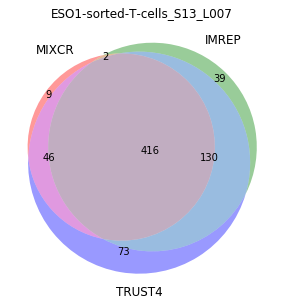

MIXCR:  170
IMREP:  295
TRUST4:  357


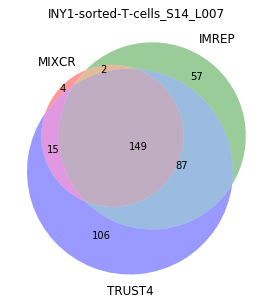

MIXCR:  307
IMREP:  553
TRUST4:  592


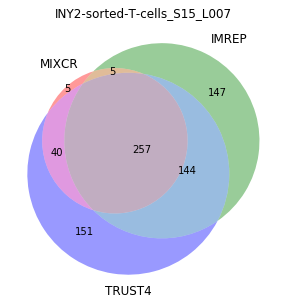

In [95]:
T_cell_rich_monoclonal_samples = ['ESO1-sorted-T-cells_S13_L007','INY1-sorted-T-cells_S14_L007','INY2-sorted-T-cells_S15_L007']
for sample in T_cell_rich_monoclonal_samples:
    ax = plt.subplots(figsize = (5,5))
    MIXCR_figure = MIXCR.loc[MIXCR['Sample'] == sample]
    MIXCR_list = MIXCR_figure['CDR3'].tolist()
    print('MIXCR: ', len(MIXCR_list))
    IMREP_figure = IMREP.loc[IMREP['Sample'] == sample]
    IMREP_list = IMREP_figure['CDR3'].tolist()
    print('IMREP: ', len(IMREP_list))
    TRUST4_figure = TRUST4.loc[TRUST4['Sample'] == sample]
    TRUST4_list = TRUST4_figure['CDR3'].tolist()
    print('TRUST4: ', len(TRUST4_list))

    venn3([set(MIXCR_list), set(IMREP_list), set(TRUST4_list)], 
          set_labels=('MIXCR', 'IMREP', 'TRUST4'),alpha = 0.4)
    plt.title(sample)
    plt.show()

T_cell_rich_polyclonal

MIXCR:  7
IMREP:  10
TRUST4:  14


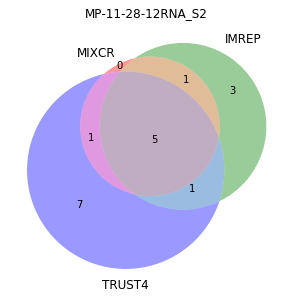

MIXCR:  38
IMREP:  202
TRUST4:  266


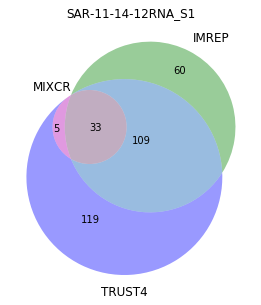

MIXCR:  215
IMREP:  451
TRUST4:  510


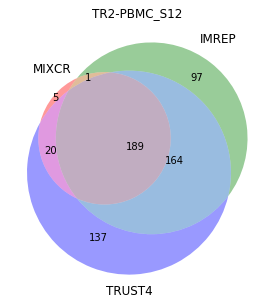

MIXCR:  340
IMREP:  1788
TRUST4:  1823


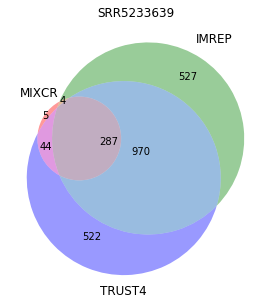

In [96]:
T_cell_rich_polyclonal_samples = ['MP-11-28-12RNA_S2','SAR-11-14-12RNA_S1','TR2-PBMC_S12','SRR5233639']
for sample in T_cell_rich_polyclonal_samples:
    ax = plt.subplots(figsize = (5,5))
    MIXCR_figure = MIXCR.loc[MIXCR['Sample'] == sample]
    MIXCR_list = MIXCR_figure['CDR3'].tolist()
    print('MIXCR: ', len(MIXCR_list))
    IMREP_figure = IMREP.loc[IMREP['Sample'] == sample]
    IMREP_list = IMREP_figure['CDR3'].tolist()
    print('IMREP: ', len(IMREP_list))
    TRUST4_figure = TRUST4.loc[TRUST4['Sample'] == sample]
    TRUST4_list = TRUST4_figure['CDR3'].tolist()
    print('TRUST4: ', len(TRUST4_list))

    venn3([set(MIXCR_list), set(IMREP_list), set(TRUST4_list)], 
          set_labels=('MIXCR', 'IMREP', 'TRUST4'),alpha = 0.4)
    plt.title(sample)
    plt.show()

T_cell_poor_polyclonal

MIXCR:  30
IMREP:  59
TRUST4:  120


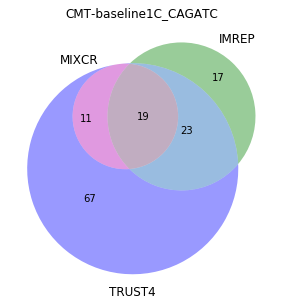

MIXCR:  0
IMREP:  1
TRUST4:  2


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")


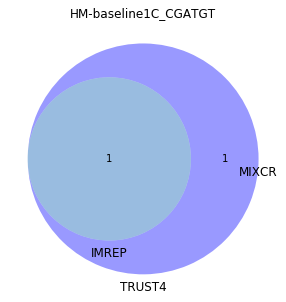

MIXCR:  28
IMREP:  36
TRUST4:  52


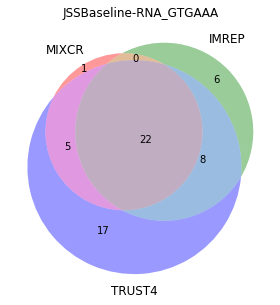

MIXCR:  39
IMREP:  59
TRUST4:  97


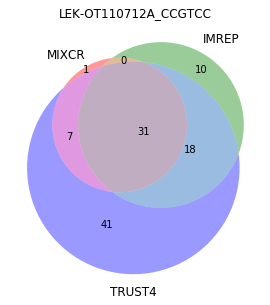

MIXCR:  14
IMREP:  20
TRUST4:  42


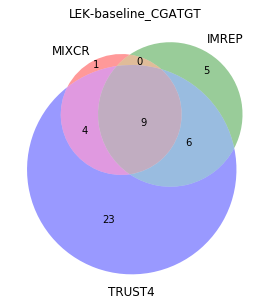

MIXCR:  2
IMREP:  7
TRUST4:  7


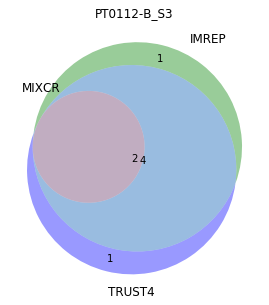

MIXCR:  3
IMREP:  2
TRUST4:  7


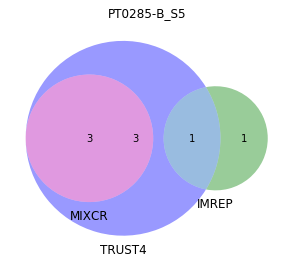

MIXCR:  17
IMREP:  14
TRUST4:  16


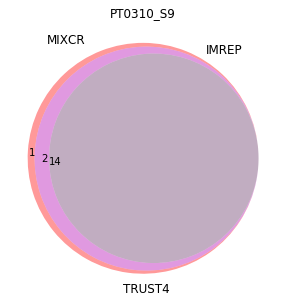

MIXCR:  19
IMREP:  26
TRUST4:  37


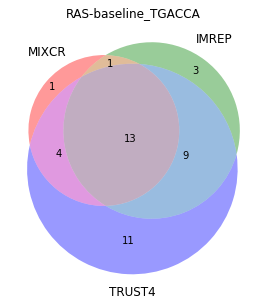

MIXCR:  0
IMREP:  10
TRUST4:  35


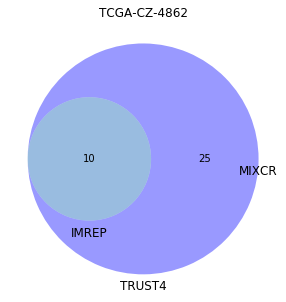

MIXCR:  0
IMREP:  3
TRUST4:  10


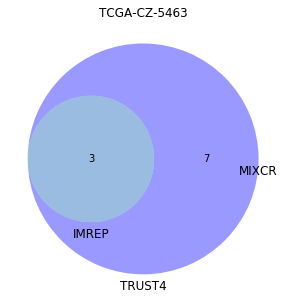

MIXCR:  0
IMREP:  2
TRUST4:  13


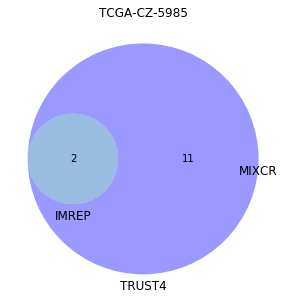

MIXCR:  24
IMREP:  82
TRUST4:  87


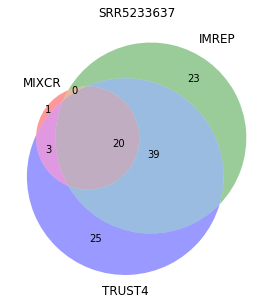

In [97]:
T_cell_poor_polyclonal_samples = ['CMT-baseline1C_CAGATC', 'HM-baseline1C_CGATGT','JSSBaseline-RNA_GTGAAA','LEK-OT110712A_CCGTCC','LEK-baseline_CGATGT','PT0112-B_S3','PT0285-B_S5','PT0310_S9',
            'RAS-baseline_TGACCA','TCGA-CZ-4862','TCGA-CZ-5463','TCGA-CZ-5985','SRR5233637']
for sample in T_cell_poor_polyclonal_samples:
    ax = plt.subplots(figsize = (5,5))
    MIXCR_figure = MIXCR.loc[MIXCR['Sample'] == sample]
    MIXCR_list = MIXCR_figure['CDR3'].tolist()
    print('MIXCR: ', len(MIXCR_list))
    IMREP_figure = IMREP.loc[IMREP['Sample'] == sample]
    IMREP_list = IMREP_figure['CDR3'].tolist()
    print('IMREP: ', len(IMREP_list))
    TRUST4_figure = TRUST4.loc[TRUST4['Sample'] == sample]
    TRUST4_list = TRUST4_figure['CDR3'].tolist()
    print('TRUST4: ', len(TRUST4_list))

    venn3([set(MIXCR_list), set(IMREP_list), set(TRUST4_list)], 
          set_labels=('MIXCR', 'IMREP', 'TRUST4'),alpha = 0.4)
    plt.title(sample)
    plt.show()

MIXCR:  950
IMREP:  1435
TRUST4:  1614


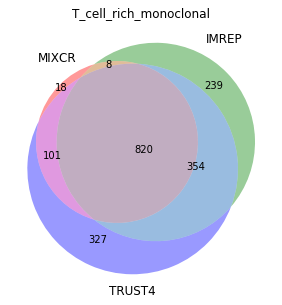

MIXCR:  600
IMREP:  2451
TRUST4:  2613


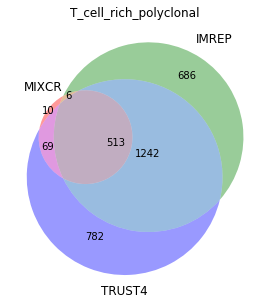

MIXCR:  176
IMREP:  321
TRUST4:  525


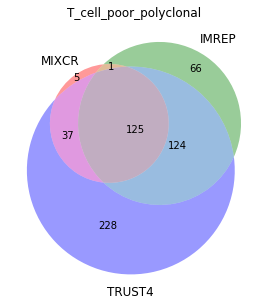

In [91]:
repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']
for repertoire in repertoire_classes:
    ax = plt.subplots(figsize = (5,5))
    MIXCR_figure = MIXCR.loc[MIXCR['class'] == repertoire]
    MIXCR_list = MIXCR_figure['CDR3'].tolist()
    print('MIXCR: ', len(MIXCR_list))
    IMREP_figure = IMREP.loc[IMREP['class'] == repertoire]
    IMREP_list = IMREP_figure['CDR3'].tolist()
    print('IMREP: ', len(IMREP_list))
    TRUST4_figure = TRUST4.loc[TRUST4['class'] == repertoire]
    TRUST4_list = TRUST4_figure['CDR3'].tolist()
    print('TRUST4: ', len(TRUST4_list))

    venn3([set(MIXCR_list), set(IMREP_list), set(TRUST4_list)], 
          set_labels=('MIXCR', 'IMREP', 'TRUST4'),alpha = 0.4)
    plt.title(repertoire)
    plt.show()